In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
user=pd.read_csv('/content/updated_dataset.csv')

In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56513 entries, 0 to 56512
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   56513 non-null  int64  
 1   Reg.No.      56513 non-null  object 
 2   Name         56513 non-null  object 
 3   Age          56513 non-null  int64  
 4   Gender       56513 non-null  object 
 5   DOB          56513 non-null  object 
 6   Address      56513 non-null  object 
 7   10th %       56513 non-null  float64
 8   12th %       56513 non-null  float64
 9   Stream       56513 non-null  object 
 10  Password     56513 non-null  object 
 11  Total Score  56513 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 5.2+ MB


In [4]:
user_df=user[['Age','Gender','10th %','12th %','Stream','Total Score']]#these columns are selected for training

In [5]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56513 entries, 0 to 56512
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          56513 non-null  int64  
 1   Gender       56513 non-null  object 
 2   10th %       56513 non-null  float64
 3   12th %       56513 non-null  float64
 4   Stream       56513 non-null  object 
 5   Total Score  56513 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.6+ MB


In [6]:
#identify the streams
distinct_streams=user_df['Stream'].unique()
distinct_streams

array(['Engineering', 'Medical', 'Science', 'Commerce', 'Arts'],
      dtype=object)

In [7]:
user_df['Gender']=user_df['Gender'].map({'Male': 0, 'Female': 1})
# Create a dictionary to map stream values to numerical representations
stream_mapping = {stream: i for i, stream in enumerate(distinct_streams)}

# Map the 'Stream' column using the dictionary
user_df['Stream'] = user_df['Stream'].map(stream_mapping)


<ipython-input-7-262f64c7ea9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Gender']=user_df['Gender'].map({'Male': 0, 'Female': 1})
<ipython-input-7-262f64c7ea9e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Stream'] = user_df['Stream'].map(stream_mapping)


In [11]:
# Display the mapping between original stream names and numerical representations
for stream, numerical_value in stream_mapping.items():
    print(f"Stream: {stream},     mapped  Value : {numerical_value}")


Stream: Engineering,     mapped  Value : 0
Stream: Medical,     mapped  Value : 1
Stream: Science,     mapped  Value : 2
Stream: Commerce,     mapped  Value : 3
Stream: Arts,     mapped  Value : 4


In [12]:
x=user_df.drop('Total Score',axis=1)
y=user_df['Total Score']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [22]:
models={
    #'Ridge':Ridge(),
    'Neural Network':MLPRegressor(),
    'Lasso':Lasso(),
    'Linear Regression':LinearRegression(),
    'Random Forest':RandomForestRegressor(n_estimators=200),
    'Catboost':CatBoostRegressor(),
    'XGBoost':XGBRegressor(),
    'LightGBM':LGBMRegressor()
}

In [23]:
for name, model in models.items():
  model.fit(x_train,y_train)
  print(name + ' trained')

Neural Network trained
Lasso trained
Linear Regression trained
Random Forest trained
Learning rate set to 0.076171
0:	learn: 27.6452295	total: 9.3ms	remaining: 9.29s
1:	learn: 26.0468145	total: 16.6ms	remaining: 8.27s
2:	learn: 24.6003080	total: 24.8ms	remaining: 8.24s
3:	learn: 23.2939416	total: 32.1ms	remaining: 8s
4:	learn: 22.1185321	total: 39.3ms	remaining: 7.82s
5:	learn: 21.0628235	total: 46.4ms	remaining: 7.68s
6:	learn: 20.1182768	total: 53.6ms	remaining: 7.61s
7:	learn: 19.2748981	total: 59.9ms	remaining: 7.42s
8:	learn: 18.5507000	total: 65.3ms	remaining: 7.19s
9:	learn: 17.8825425	total: 71.9ms	remaining: 7.11s
10:	learn: 17.2921723	total: 79.4ms	remaining: 7.14s
11:	learn: 16.7716014	total: 86.7ms	remaining: 7.14s
12:	learn: 16.3140867	total: 94.5ms	remaining: 7.18s
13:	learn: 15.9131759	total: 102ms	remaining: 7.18s
14:	learn: 15.5628068	total: 109ms	remaining: 7.16s
15:	learn: 15.2573922	total: 116ms	remaining: 7.13s
16:	learn: 14.9918385	total: 123ms	remaining: 7.13s
17

In [19]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [24]:
for name,model in models.items():
  y_pred = model.predict(x_test)
  mean_sq_error = mse(y_test,y_pred)
  print(name + " MSE: {:.2f}".format(mean_sq_error))
  r2score = r2_score(y_test,y_pred)
  print(name + " R2 Score: {:.2f}".format(r2score))

Neural Network MSE: 179.17
Neural Network R2 Score: 0.79
Lasso MSE: 178.77
Lasso R2 Score: 0.79
Linear Regression MSE: 178.40
Linear Regression R2 Score: 0.79
Random Forest MSE: 197.42
Random Forest R2 Score: 0.77
Catboost MSE: 179.38
Catboost R2 Score: 0.79
XGBoost MSE: 184.30
XGBoost R2 Score: 0.78
LightGBM MSE: 177.86
LightGBM R2 Score: 0.79


In [25]:
model=LGBMRegressor(random_state=42,learning_rate= 0.1)
model.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 50861, number of used features: 5
[LightGBM] [Info] Start training from score 142.548751


LGBMRegressor(random_state=42)

In [26]:
y_pred=model.predict(x_test)
mean_sq_error = mse(y_test,y_pred)
print(name + " MSE: {:.2f}".format(mean_sq_error))
r2score = r2_score(y_test,y_pred)
print(name + " R2 Score: {:.2f}".format(r2score))

LightGBM MSE: 177.86
LightGBM R2 Score: 0.79


In [27]:
x=user_df.drop('Total Score',axis=1)


In [28]:
# Predict total scores using the trained model
user_df["Predicted Total Score"] = model.predict(x)

<ipython-input-28-9127e94cdfe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["Predicted Total Score"] = model.predict(x)


In [29]:
# Calculate overall performance metrics
overall_actual_avg = user_df["Total Score"].mean()
overall_predicted_avg = user_df["Predicted Total Score"].mean()

In [30]:
# Group by stream and calculate actual & predicted averages
stream_performance = user_df.groupby("Stream").agg(
    Actual_Avg_Score=("Total Score", "mean"),
    Predicted_Avg_Score=("Predicted Total Score", "mean"),
    Student_Count=("Stream", "count")  # Count of students in each stream
).reset_index()

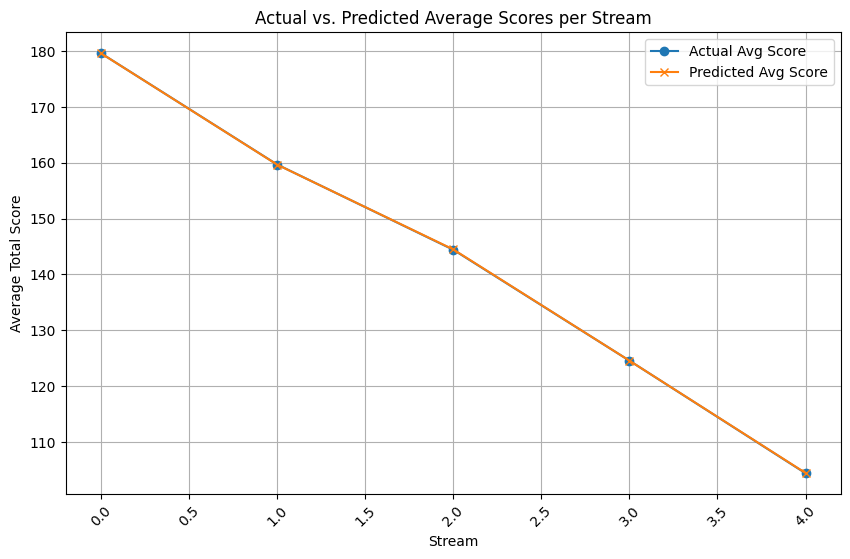

In [31]:
# line chart

import matplotlib.pyplot as plt
# Assuming 'stream_performance' DataFrame is available from the previous code

plt.figure(figsize=(10, 6))
plt.plot(stream_performance["Stream"], stream_performance["Actual_Avg_Score"], marker='o', label="Actual Avg Score")
plt.plot(stream_performance["Stream"], stream_performance["Predicted_Avg_Score"], marker='x', label="Predicted Avg Score")

plt.xlabel("Stream")
plt.ylabel("Average Total Score")
plt.title("Actual vs. Predicted Average Scores per Stream")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [32]:
std_dev = user_df["Total Score"].std()  # Standard deviation of total scores

# Define the "urgent intervention" threshold
urgent_intervention_threshold = overall_predicted_avg - (1.5 * std_dev)

# Assign feedback based on performance comparison
def performance_feedback(row):
    if row["Predicted_Avg_Score"] >= overall_predicted_avg:
        return "Good Performance"
    elif row["Predicted_Avg_Score"] >= urgent_intervention_threshold:
        return "Average, Needs Improvement"
    else:
        return "Needs Significant Improvement (Urgent Intervention)"

# Apply feedback function
stream_performance["Performance_Feedback"] = stream_performance.apply(performance_feedback, axis=1)

# Display results
print(stream_performance)


   Stream  Actual_Avg_Score  Predicted_Avg_Score  Student_Count  \
0       0        179.631208           179.623437          11196   
1       1        159.698406           159.674909          11353   
2       2        144.429457           144.488189          11447   
3       3        124.558712           124.561810          11335   
4       4        104.387229           104.437247          11182   

         Performance_Feedback  
0            Good Performance  
1            Good Performance  
2            Good Performance  
3  Average, Needs Improvement  
4  Average, Needs Improvement  


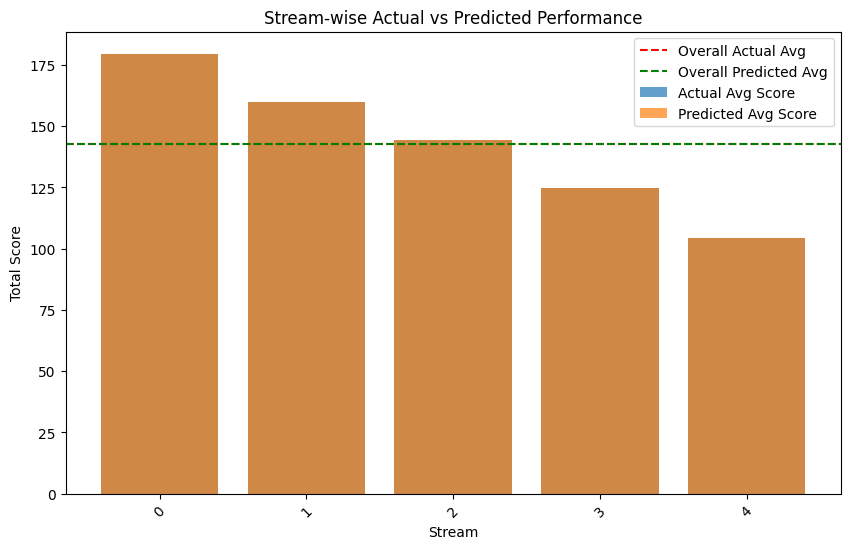

In [33]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted scores for each stream
plt.figure(figsize=(10, 6))
plt.bar(stream_performance["Stream"], stream_performance["Actual_Avg_Score"], label="Actual Avg Score", alpha=0.7)
plt.bar(stream_performance["Stream"], stream_performance["Predicted_Avg_Score"], label="Predicted Avg Score", alpha=0.7)
plt.axhline(y=overall_actual_avg, color="r", linestyle="--", label="Overall Actual Avg")
plt.axhline(y=overall_predicted_avg, color="g", linestyle="--", label="Overall Predicted Avg")
plt.xlabel("Stream")
plt.ylabel("Total Score")
plt.title("Stream-wise Actual vs Predicted Performance")
plt.legend()
plt.xticks(rotation=45)
plt.show()


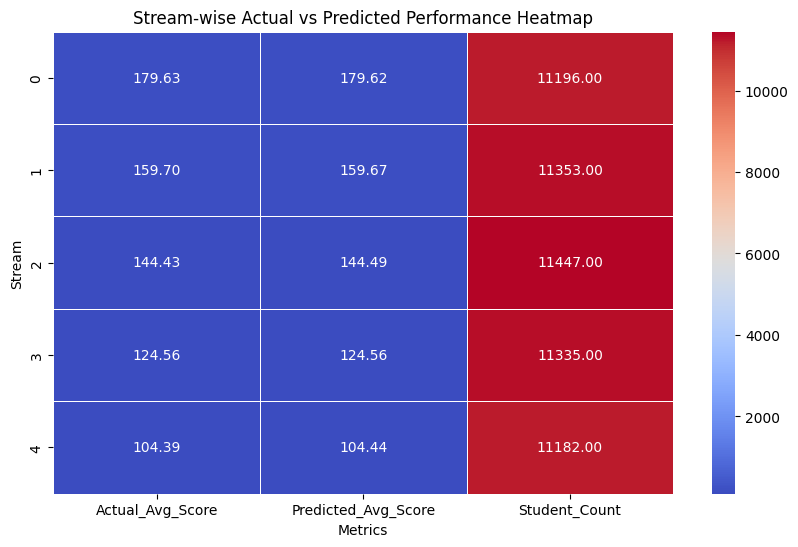

In [34]:
# Create a heatmap-friendly DataFrame, excluding the 'Performance_Feedback' column
heatmap_data = stream_performance.drop(columns=["Performance_Feedback"]).set_index("Stream")

# Define color coding: Streams below urgent threshold in red shades
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Titles & labels
plt.title("Stream-wise Actual vs Predicted Performance Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Stream")

# Show plot
plt.show()

In [38]:
import numpy as np

def evaluate_student_performance(student_data, model, stream_avg_scores, overall_avg_score):
    """
    Compare an individual student's total score to their stream's predicted performance and overall student performance.

    Parameters:
    - student_data: Dictionary with student details (Age, Gender, 10th %, 12th %, Stream, Total Score).
    - model: Trained regression model.
    - stream_avg_scores: DataFrame containing predicted avg scores per stream.
    - overall_avg_score: Overall predicted average score across all students.

    Returns:
    - Performance feedback comparing stream-wise and overall student performance.
    """
    # Convert student data to the format used for model prediction
    student_features = np.array([[
        student_data["Age"],
        student_data["Gender"],
        student_data["10th %"],
        student_data["12th %"],
        student_data["Stream"]
    ]])

    # Predict total score using the trained model
    predicted_score = model.predict(student_features)[0]

    # Get the stream’s predicted average score
    stream_avg = stream_avg_scores.loc[stream_avg_scores["Stream"] == student_data["Stream"], "Predicted_Avg_Score"].values[0]

    # Compare actual score to stream-wise and overall performance
    if student_data["Total Score"] >= stream_avg:# + 10:
        stream_feedback = "Good Performance in Stream"
    elif student_data["Total Score"] >= stream_avg - 10:
        stream_feedback = "Average Performance in Stream"
    else:
        stream_feedback = "Needs Improvement in Stream"

    if student_data["Total Score"] >= overall_avg_score :#+ 10:
        overall_feedback = "Good Overall Performance"
    elif student_data["Total Score"] >= overall_avg_score - 10:
        overall_feedback = "Average Overall Performance"
    else:
        overall_feedback = "Needs Improvement Overall"

    return {
        "Actual Score": student_data["Total Score"],
        "Predicted Score": predicted_score,
        "Stream Avg Predicted Score": stream_avg,
        "Overall Avg Predicted Score": overall_avg_score,
        "Stream Performance Feedback": stream_feedback,
        "Overall Performance Feedback": overall_feedback
    }

# Example Student Data (Stream 2 - Science)
student = {
    "Age": 18,
    "Gender": 1,  # Assume 1 for Male, 0 for Female
    "10th %": 85,
    "12th %": 88,
    "Stream": 2,  # Example: 2 -> Science
    "Total Score": 150
}

# Assume `model` is your trained LightGBM model
# Assume `stream_avg_scores` is your summary dataframe
# Assume `overall_avg_score` is the mean of all students' predicted scores
#overall_avg_score = stream_avg_scores["Predicted_Avg_Score"].mean()
overall_avg_score = stream_performance["Predicted_Avg_Score"].mean()

performance_result = evaluate_student_performance(student, model, stream_performance, overall_avg_score)
print(performance_result)


{'Actual Score': 150, 'Predicted Score': 144.62205266036992, 'Stream Avg Predicted Score': 144.4881891259242, 'Overall Avg Predicted Score': 142.5571185647901, 'Stream Performance Feedback': 'Good Performance in Stream', 'Overall Performance Feedback': 'Good Overall Performance'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


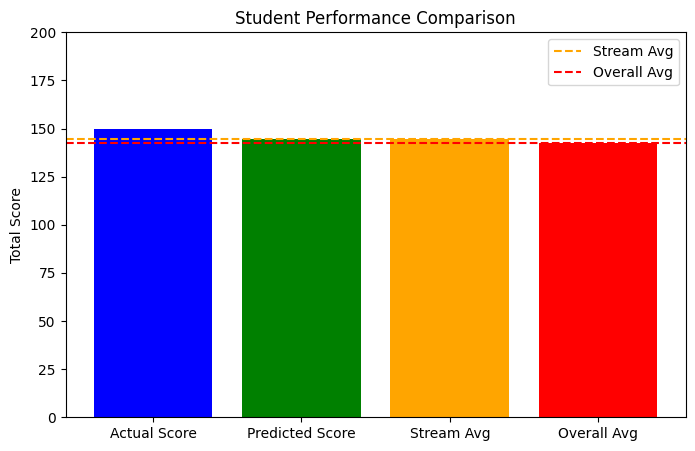

In [41]:
# 1️.Bar Chart: Compare Student's Score vs. Averages**
actual_score = 150
predicted_score = performance_result["Predicted Score"]
student_stream_avg = performance_result["Stream Avg Predicted Score"]
overall_avg_score = performance_result["Overall Avg Predicted Score"]

plt.figure(figsize=(8, 5))
categories = ['Actual Score', 'Predicted Score', 'Stream Avg', 'Overall Avg']
values = [actual_score, predicted_score, student_stream_avg, overall_avg_score]

plt.bar(categories, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 200)
plt.ylabel("Total Score")
plt.title("Student Performance Comparison")
plt.axhline(y=student_stream_avg, color='orange', linestyle='dashed', label="Stream Avg")
plt.axhline(y=overall_avg_score, color='red', linestyle='dashed', label="Overall Avg")
plt.legend()
plt.show()


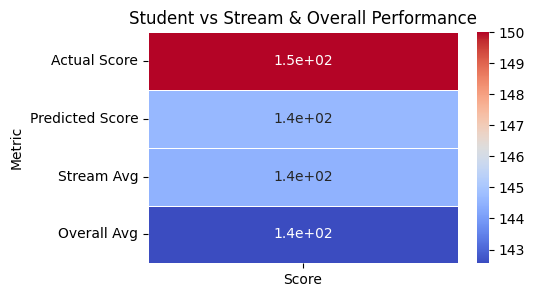

In [43]:
# 2.Heatmap Visualization**
data = pd.DataFrame({
    "Metric": ["Actual Score", "Predicted Score", "Stream Avg", "Overall Avg"],
    "Score": [actual_score, predicted_score, student_stream_avg, overall_avg_score]
})

plt.figure(figsize=(5, 3))
sns.heatmap(data.set_index("Metric"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Student vs Stream & Overall Performance")
plt.show()

